# Задание 2 Вариант 29

Хомутов Евений Васильевич, БПМ-151

In [1]:
from sympy.solvers import solve
from sympy import Symbol, diff, sqrt,cos,sin
from scipy.misc import derivative
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Определим необходимые для решения задач методы

In [2]:
def BisecMethod(f,a,b,epselon):
    n = 0
    A = a
    B = b
    while (B-A) >= 2*epselon:
        n = n + 1
        x = (A+B)/2
        if f(x)*f(A) < 0:
            B = x
        elif f(x)*f(B) < 0:
            A = x
    return x, n

In [3]:
def NewtoonMethod(f,x,epselon):
    n = 1
    x_old = x
    x_new = x_old - f(x_old)/derivative(f,x_old,dx = epselon)
    while abs(x_new - x_old) >= epselon:
        x_old = x_new
        x_new = x_old - f(x_old)/derivative(f,x_old,dx = epselon)
        n = n + 1
    return x_new, n

In [36]:
def SimpleIterationMethod(phi,f,x,q,epselon):
    n = 1
    x_old = x
    x_new = phi(x_old,f)
    while abs(x_new - x_old) >= (1 - q)/q*epselon:
        x_old = x_new
        x_new = phi(x_old,f)
        n = n + 1
    return x_new,q, n

In [5]:
x = Symbol('x') # Чтобы найти ответы встроеными методами

In [6]:
# Задание 1
def f1(x):
    return x**4 - 26/5 * x**2 + 1
def g1(x):
    return x**4 - 10 * x**2 + 25
epselon1 = 10**(-10)
a1 = 0
b1 = 3
# Задание 2
def f2(x):
    return np.sqrt(x)-np.cos(x)
epselon2 = 10**(-6)
# Задание 3
def f3(x):
    return x - np.e**(-x**(2))
epselon3 = 10**(-5)

In [7]:
ExactAnswer1 = solve(f1(x),x)
ExactAnswer1

[-2.23606797749979, -0.447213595499958, 0.447213595499958, 2.23606797749979]

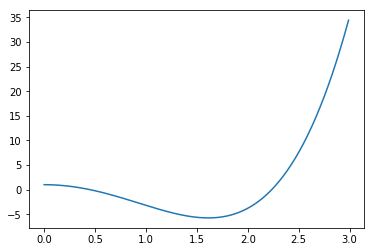

In [8]:
X = np.arange(a1, b1, 0.01)

fig = plt.figure() 
plt.plot(X, f1(X))
plt.show() 

In [9]:
# Из графика поулчаем что отрезко локализации, например [0;1] и [2;3]
x11 = BisecMethod(f1,0,1,0.1*epselon1)
x12 = BisecMethod(f1,2,3,0.1*epselon1)
print(x11, x12)

(0.447213595485664, 36) (2.2360679774865275, 36)


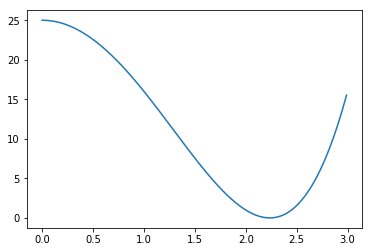

In [10]:
fig = plt.figure()
plt.plot(X, g1(X))
plt.show()

In [11]:
ExactAnswer12 = solve(g1(x),x)
ExactAnswer12

[-sqrt(5), sqrt(5)]

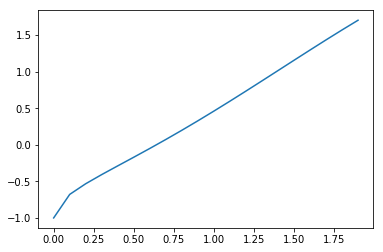

In [12]:
X = np.arange(0, 2,0.1)
fig = plt.figure()
plt.plot(X, f2(X))
plt.show()

In [13]:
print(NewtoonMethod(f2,0.75,epselon2))
print(BisecMethod(f2,0,1,epselon2))

(0.64171437087289618, 3)
(0.6417140960693359, 19)


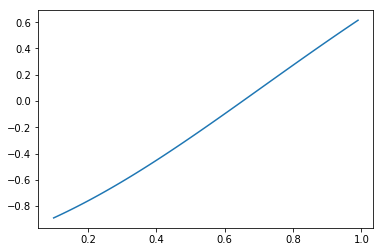

In [14]:
X = np.arange(0.1, 1, 0.01)

fig = plt.figure() 
plt.plot(X, f3(X))
plt.show() 

In [18]:
# Отрезок локализации
a3 = .6
b3 = .7

In [17]:
f3(x)

x - 2.71828182845905**(-x**2)

In [22]:
# Определим константы m и M из графика производной
# Производную нашли ручками -  у нас же не лапки
def ff3(x):
    return 1 + 2*x*np.e**(-x**2)

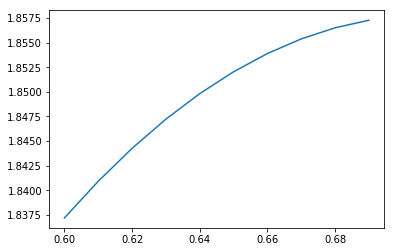

In [27]:
X = np.arange(a3, b3, 0.01)

fig = plt.figure() 
plt.plot(X, ff3(X))
plt.show() 

In [31]:
# Следовательно для m и M берем значение производной в начале и конце отрезка соответсвенно
m = ff3(a3)
M = ff3(b3)
# Определим q
q = (M-m)/(M+m)
# Определим функцию phi
def phi(x,f):
    return x - 2/(M+m)*f(x)

In [37]:
SimpleIterationMethod(phi,f3,a3+b3/2,q,epselon3)

(0.6529186597988018, 0.005538830287837204, 3)

In [39]:
# Сделаем из метода простой итерации метод Ньютона - потому что все любят Ньютона

def gamma(x,f):
    return x - f(x)/derivative(f,x,dx = 10**(-5))

def Gamma(x):
    return (-np.e**(-(x)**2)+x)*(2*np.e**(-x**2)-4*x**2*np.e**(-x**2))/(1+2*x*np.e**(-x**2))**2

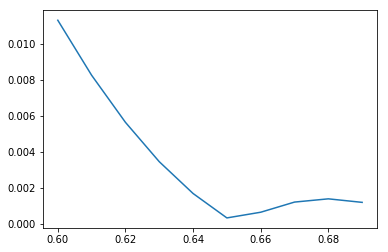

In [41]:
X = np.arange(a3, b3, 0.01)

fig = plt.figure() 
plt.plot(X, abs(Gamma(X)))
plt.show() 

In [42]:
# Следовательно Q равен значению гамма в начале отрезка
Q = abs(Gamma(a3))

In [43]:
SimpleIterationMethod(gamma,f3,a3+b3/2,Q,epselon3)

(0.6529186404213283, 0.011306103997355802, 3)

In [44]:
NewtoonMethod(f3,a3+b3/2,epselon3)

(0.6529186404213283, 3)